<a href="https://colab.research.google.com/github/RafsanJany-44/Thesis_Project/blob/main/Feature_Selection_C4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
data = pd.read_csv("/content/C2.csv")
X = data.iloc[:,1:26] #independent columns
y = data[['Sleep Stage']]   #target column 

In [2]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)

In [3]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [4]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

In [5]:
featureScores

,Specs,Score
0,MeanP_Alpha_C4,73.011221
1,MedianF_Alpha_C4,241.550225
2,MeanF_Alpha_C4,2611.046019
3,Spectral Edge_Alpha_C4,2974.373264
4,PeakF_Alpha_C4,594.468217
5,MeanP_Beta_C4,115.794050
6,MedianF_Beta_C4,797.381968
7,MeanF_Beta_C4,621.336421
8,Spectral Edge_Beta_C4,2462.497644
9,PeakF_Beta_C4,5119.792004


In [6]:
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                     Specs        Score
9            PeakF_Beta_C4  5119.792004
3   Spectral Edge_Alpha_C4  2974.373264
2           MeanF_Alpha_C4  2611.046019
8    Spectral Edge_Beta_C4  2462.497644
24          PeakF_Gamma_C4  1887.770108
17          MeanF_Delta_C4  1843.130129
11        MedianF_Theta_C4  1488.408950
19          PeakF_Delta_C4   915.759185
6          MedianF_Beta_C4   797.381968
15          MeanP_Delta_C4   733.209581


#Another Algorithm to Compare the result (ExtraTreesClassifier)

In [7]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(featureScores.nlargest(10,'Score'))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


                     Specs        Score
9            PeakF_Beta_C4  5119.792004
3   Spectral Edge_Alpha_C4  2974.373264
2           MeanF_Alpha_C4  2611.046019
8    Spectral Edge_Beta_C4  2462.497644
24          PeakF_Gamma_C4  1887.770108
17          MeanF_Delta_C4  1843.130129
11        MedianF_Theta_C4  1488.408950
19          PeakF_Delta_C4   915.759185
6          MedianF_Beta_C4   797.381968
15          MeanP_Delta_C4   733.209581


In [9]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.03586667 0.03237476 0.06075093 0.04689542 0.02635625 0.03527771
 0.05558327 0.03963849 0.04123961 0.02700051 0.03633086 0.06907814
 0.03716941 0.03831692 0.03942287 0.03951974 0.0351131  0.07803136
 0.05899356 0.02618642 0.03403409 0.03163708 0.02957497 0.02616727
 0.01944059]


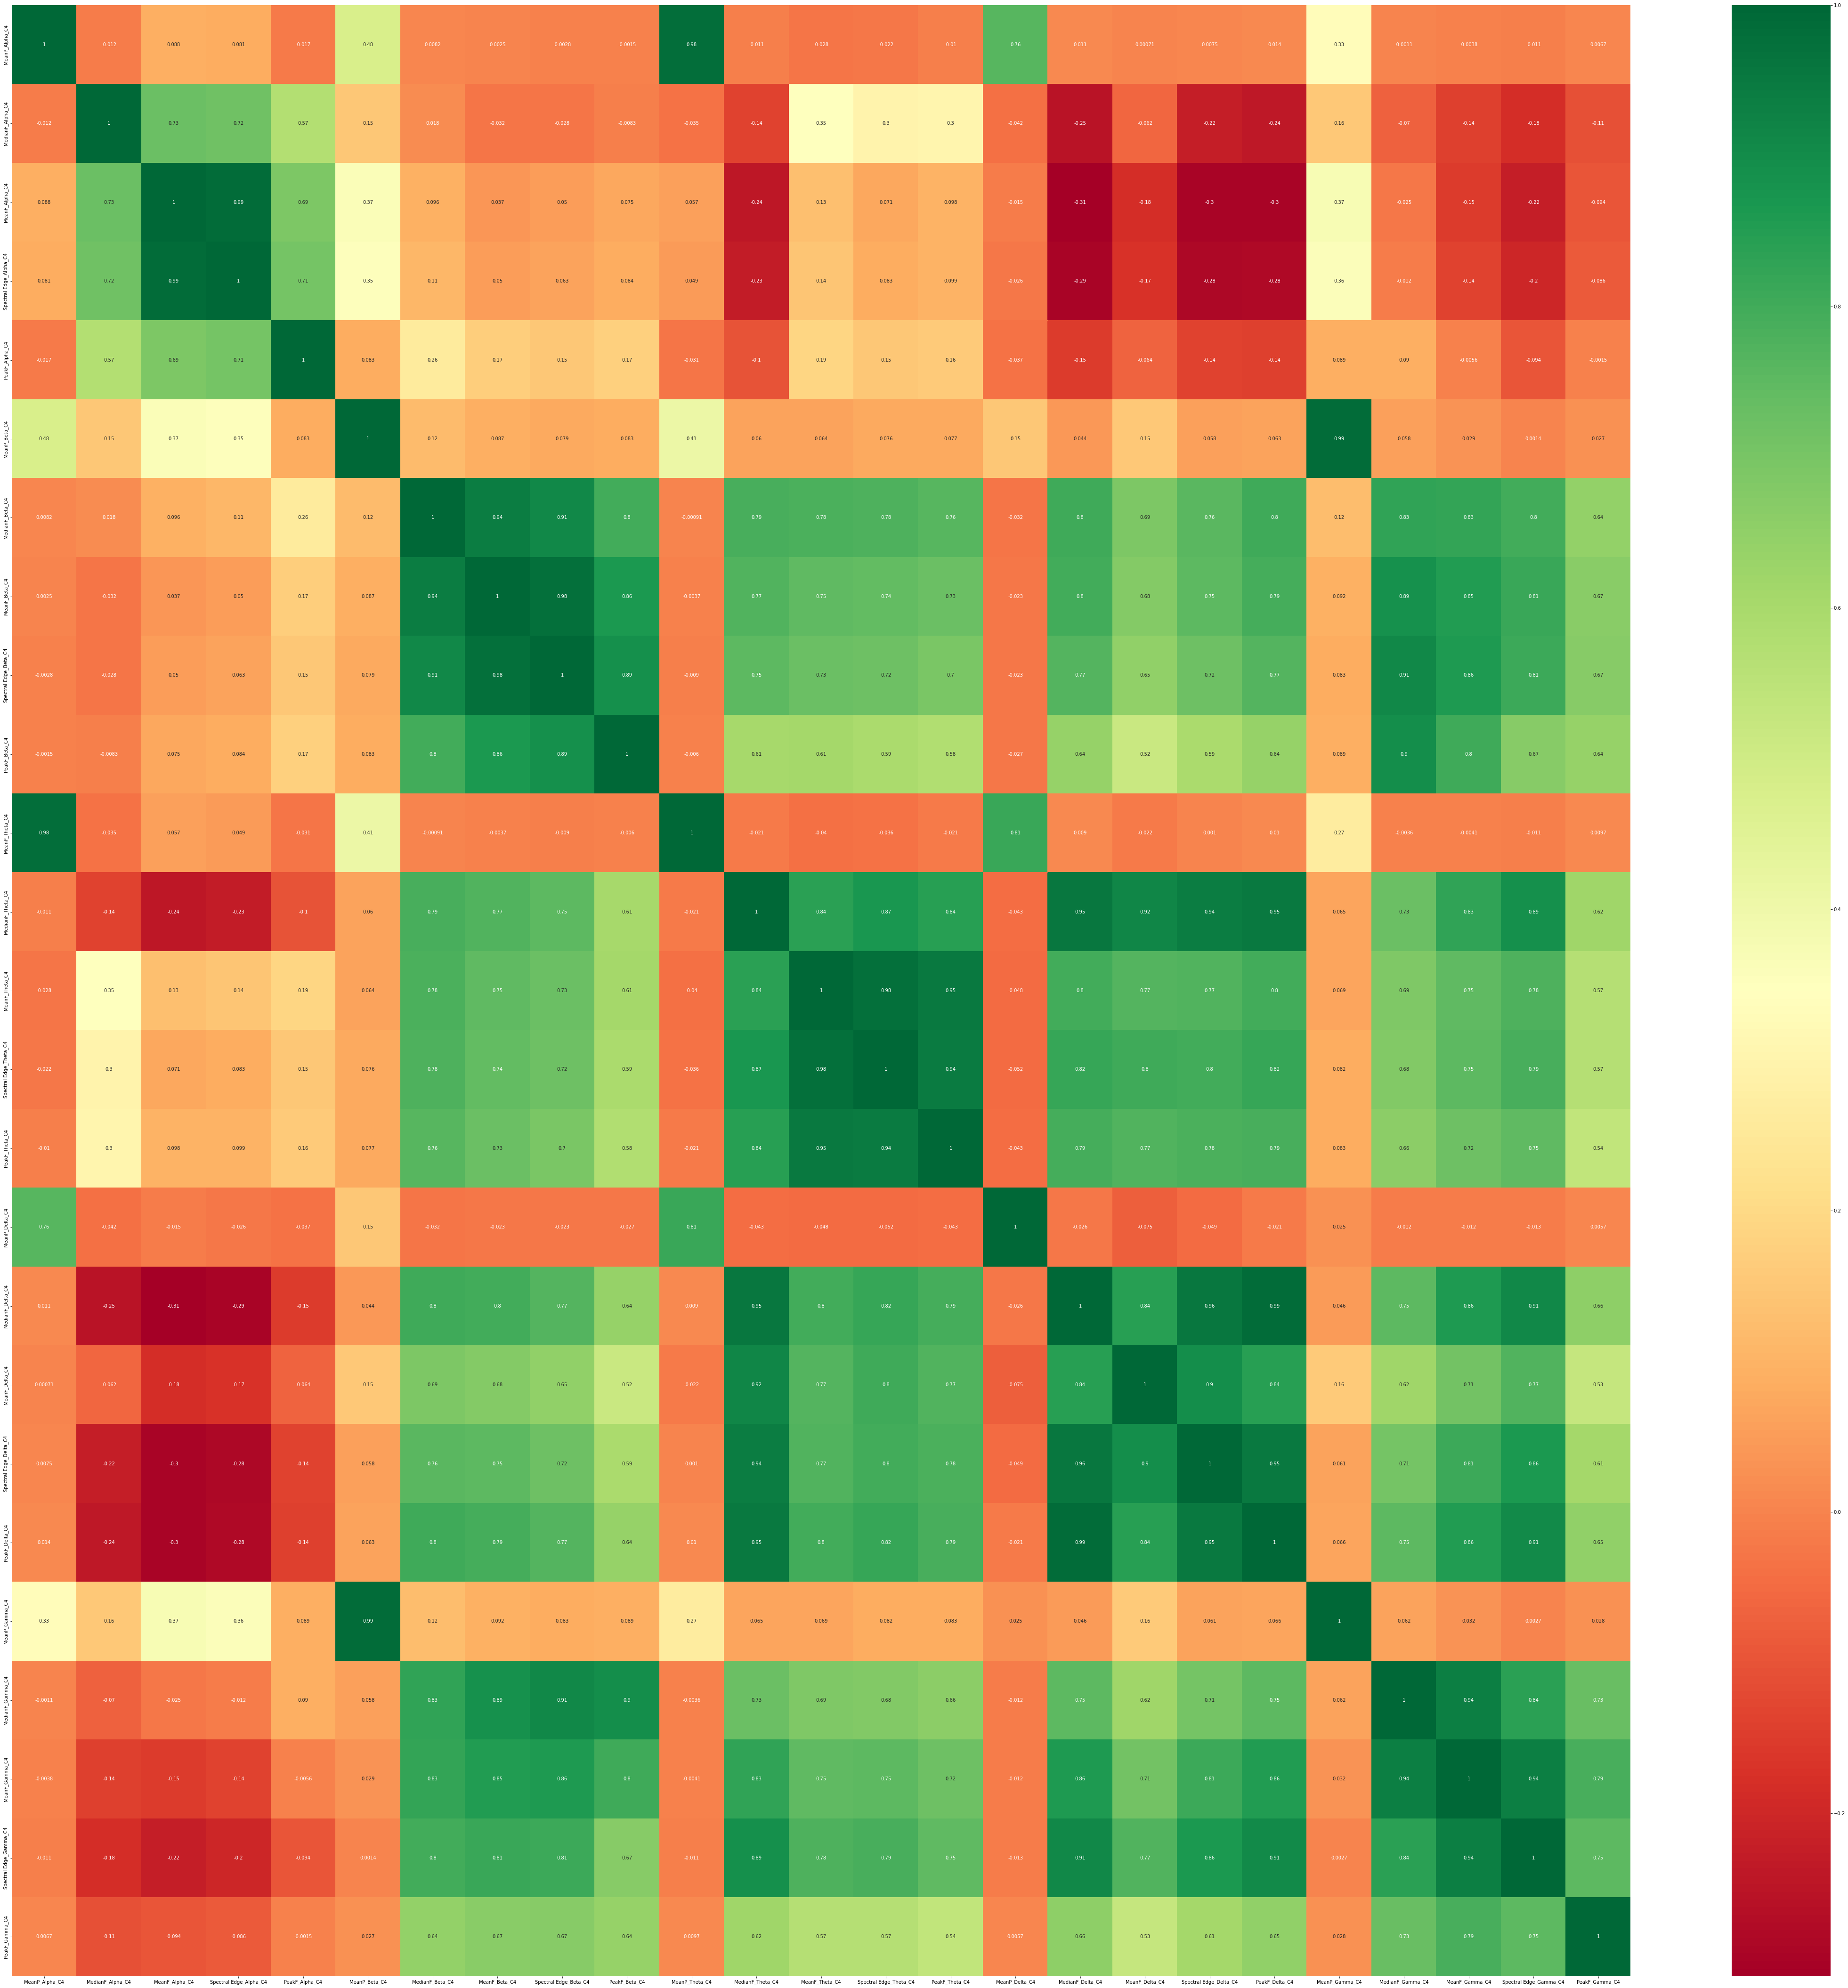

In [10]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(77,77))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")